
# Bacteria classification

In this example, we will benchmark the performance of a variety of machine learning models on a dataset of Raman spectra of
30 different bacteria species. The dataset is from [1]_.

## Prerequisites


In [1]:
from lazypredict.Supervised import LazyClassifier
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import ramanspy

In [21]:
plt.rcdefaults()

## Data loading
Load the fine-tuning/validation and testing datasets from the original paper, alongside the corresponding labels.



In [3]:
dir_ = r"../data/bacteria_data"

X_train, y_train = ramanspy.datasets.bacteria("val", folder=dir_)
X_test, y_test = ramanspy.datasets.bacteria("test", folder=dir_)

y_labels, antibiotics_labels = ramanspy.datasets.bacteria("labels")

Define the order in which to plot the species throughout the example. The same order as in the original paper.



In [4]:
plotting_order = [16, 17, 14, 18, 15, 20, 21, 24, 23, 26, 27, 28, 29, 25, 6, 7, 5, 3, 4, 9, 10, 2, 8, 11, 22, 19, 12, 13, 0, 1]

## Exploratory analysis
Group training data into species classes for plotting.



In [5]:
spectra = [[X_train[y_train == species_id]] for species_id in list(np.unique(y_train))]

Normalise the spectra using min-max normalisation.



In [6]:
spectra_ = ramanspy.preprocessing.normalise.MinMax().apply(spectra)

Define colormaps (for visualisation purposes).



In [22]:
cmap = plt.cm.get_cmap()  # using matplotlib's default colormap
colors = list(cmap(np.linspace(0, 1, len(list(np.unique(antibiotics_labels))))))

# defining the color map for the different antibiotic groups
antibiotics_map_ = [antibiotics_labels[i] for i in plotting_order]
antibiotic_color_map = {a: c for a, c in zip(list(np.unique(antibiotics_map_)), colors)}
antibiotics_colors = [antibiotic_color_map[a] for a in antibiotics_map_]

Plot the mean spectra of each species (data from finetuning dataset).



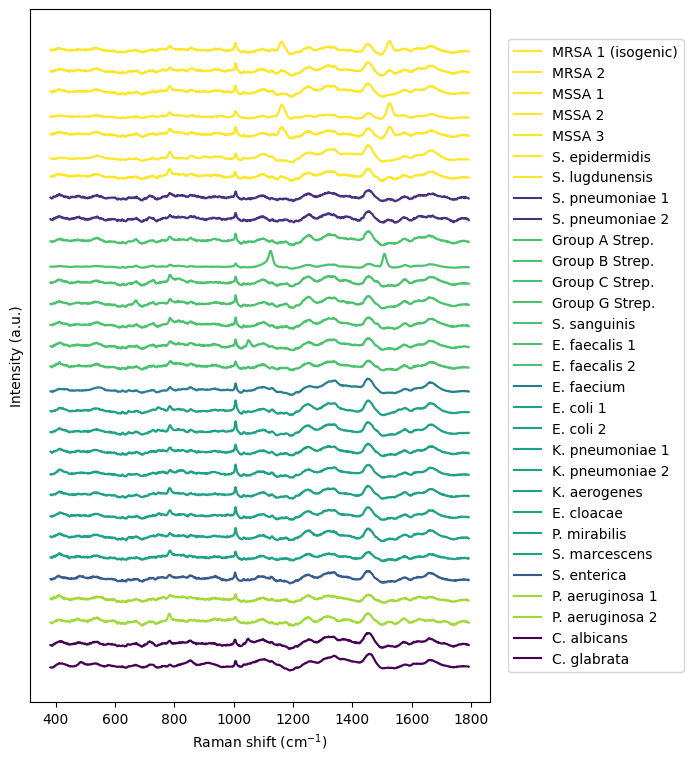

In [23]:
plt.figure(figsize=(8, 9))
_ = ramanspy.plot.mean_spectra([spectra_[i] for i in plotting_order], label=[y_labels[i] for i in plotting_order], plot_type="single stacked", color=antibiotics_colors, title=None)

## Benchmarking
Next, we will benchmark a variety of machine learning models on task of predicting the bacteria species class each
spectrum belongs to. We will train the models on the validation/fine-tuning dataset and test them on the testing dataset.



To guide the training, it is important to shuffle the training dataset, which is originally ordered by bacteria species.



In [9]:
X_train, y_train = shuffle(X_train.flat.spectral_data, y_train)

We can use [the lazypredict Python package](https://lazypredict.readthedocs.io/en/latest/) to benchmark the performance of a variety of machine learning models.



In [10]:
clf = LazyClassifier()
models_test, predictions_test = clf.fit(X_train, X_test.spectral_data, y_train, y_test)

100%|██████████| 29/29 [05:53<00:00, 12.18s/it]


Print the benchmarking results.



In [11]:
models_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.80,0.80,None,0.79,1.60
SVC,0.76,0.76,None,0.75,10.63
NuSVC,0.75,0.75,None,0.75,12.43
SGDClassifier,0.75,0.75,None,0.74,1.90
LinearDiscriminantAnalysis,0.73,0.73,None,0.72,1.72
CalibratedClassifierCV,0.65,0.65,None,0.63,159.39
PassiveAggressiveClassifier,0.65,0.65,None,0.63,2.66
RidgeClassifierCV,0.61,0.61,None,0.59,1.27
RidgeClassifier,0.61,0.61,None,0.59,0.44


Plot the benchmarking results in a bar chart.



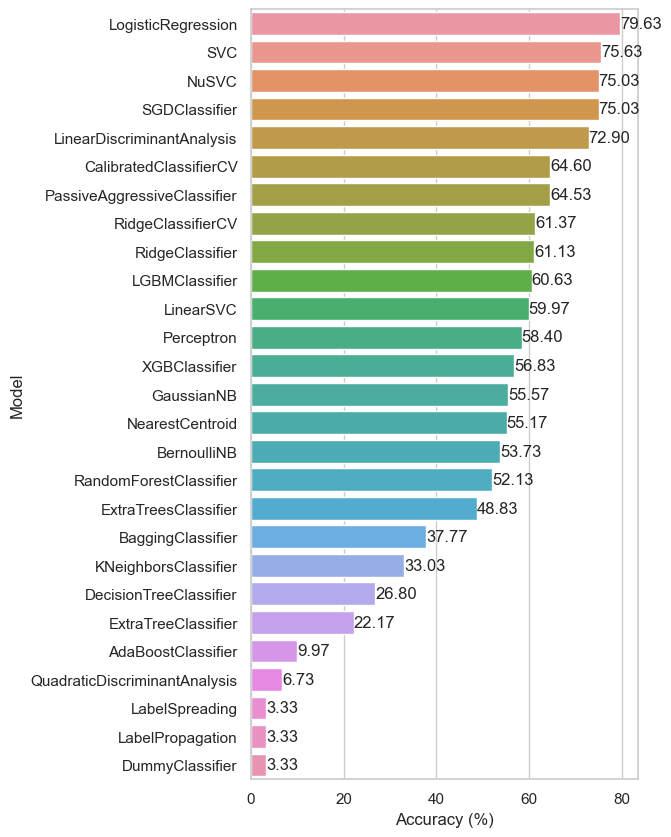

In [12]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(5, 10))
models_test['Accuracy (%)'] = models_test['Accuracy']*100
ax = sns.barplot(y=models_test.index, x='Accuracy (%)', data=models_test)
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f')

Get the best performing model.



In [13]:
best_model = models_test.index[0]
print(f"The best performing model is: {best_model}")

The best performing model is: LogisticRegression


## Logistic regression modelling
As the benchmarking results show, the Logistic Regression model performs the best. We thus select this model for the
consecutive analyses where we analyse the model's performance in more detail for the task of predicting the bacteria
species class each spectrum belongs to, as well as the task of predicting the antibiotic class each spectrum belongs to.



In [14]:
from sklearn.linear_model import LogisticRegression

# Then, we can simply use `scikit-learn's` implementation of logistic regression.
model = LogisticRegression()

Normalise the data



In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test.flat.spectral_data)

Training the logistic regression model on the training dataset.



In [16]:
_ = model.fit(X_train, y_train)

### Species-level classification



Testing the trained model on the unseen testing dataset.



In [17]:
y_pred = model.predict(X_test)
print(f"The accuracy of the Logistic Regression model is: {accuracy_score(y_pred, y_test)}")

The accuracy of the Logistic Regression model is: 0.7963333333333333


Plot the confusion matrix.



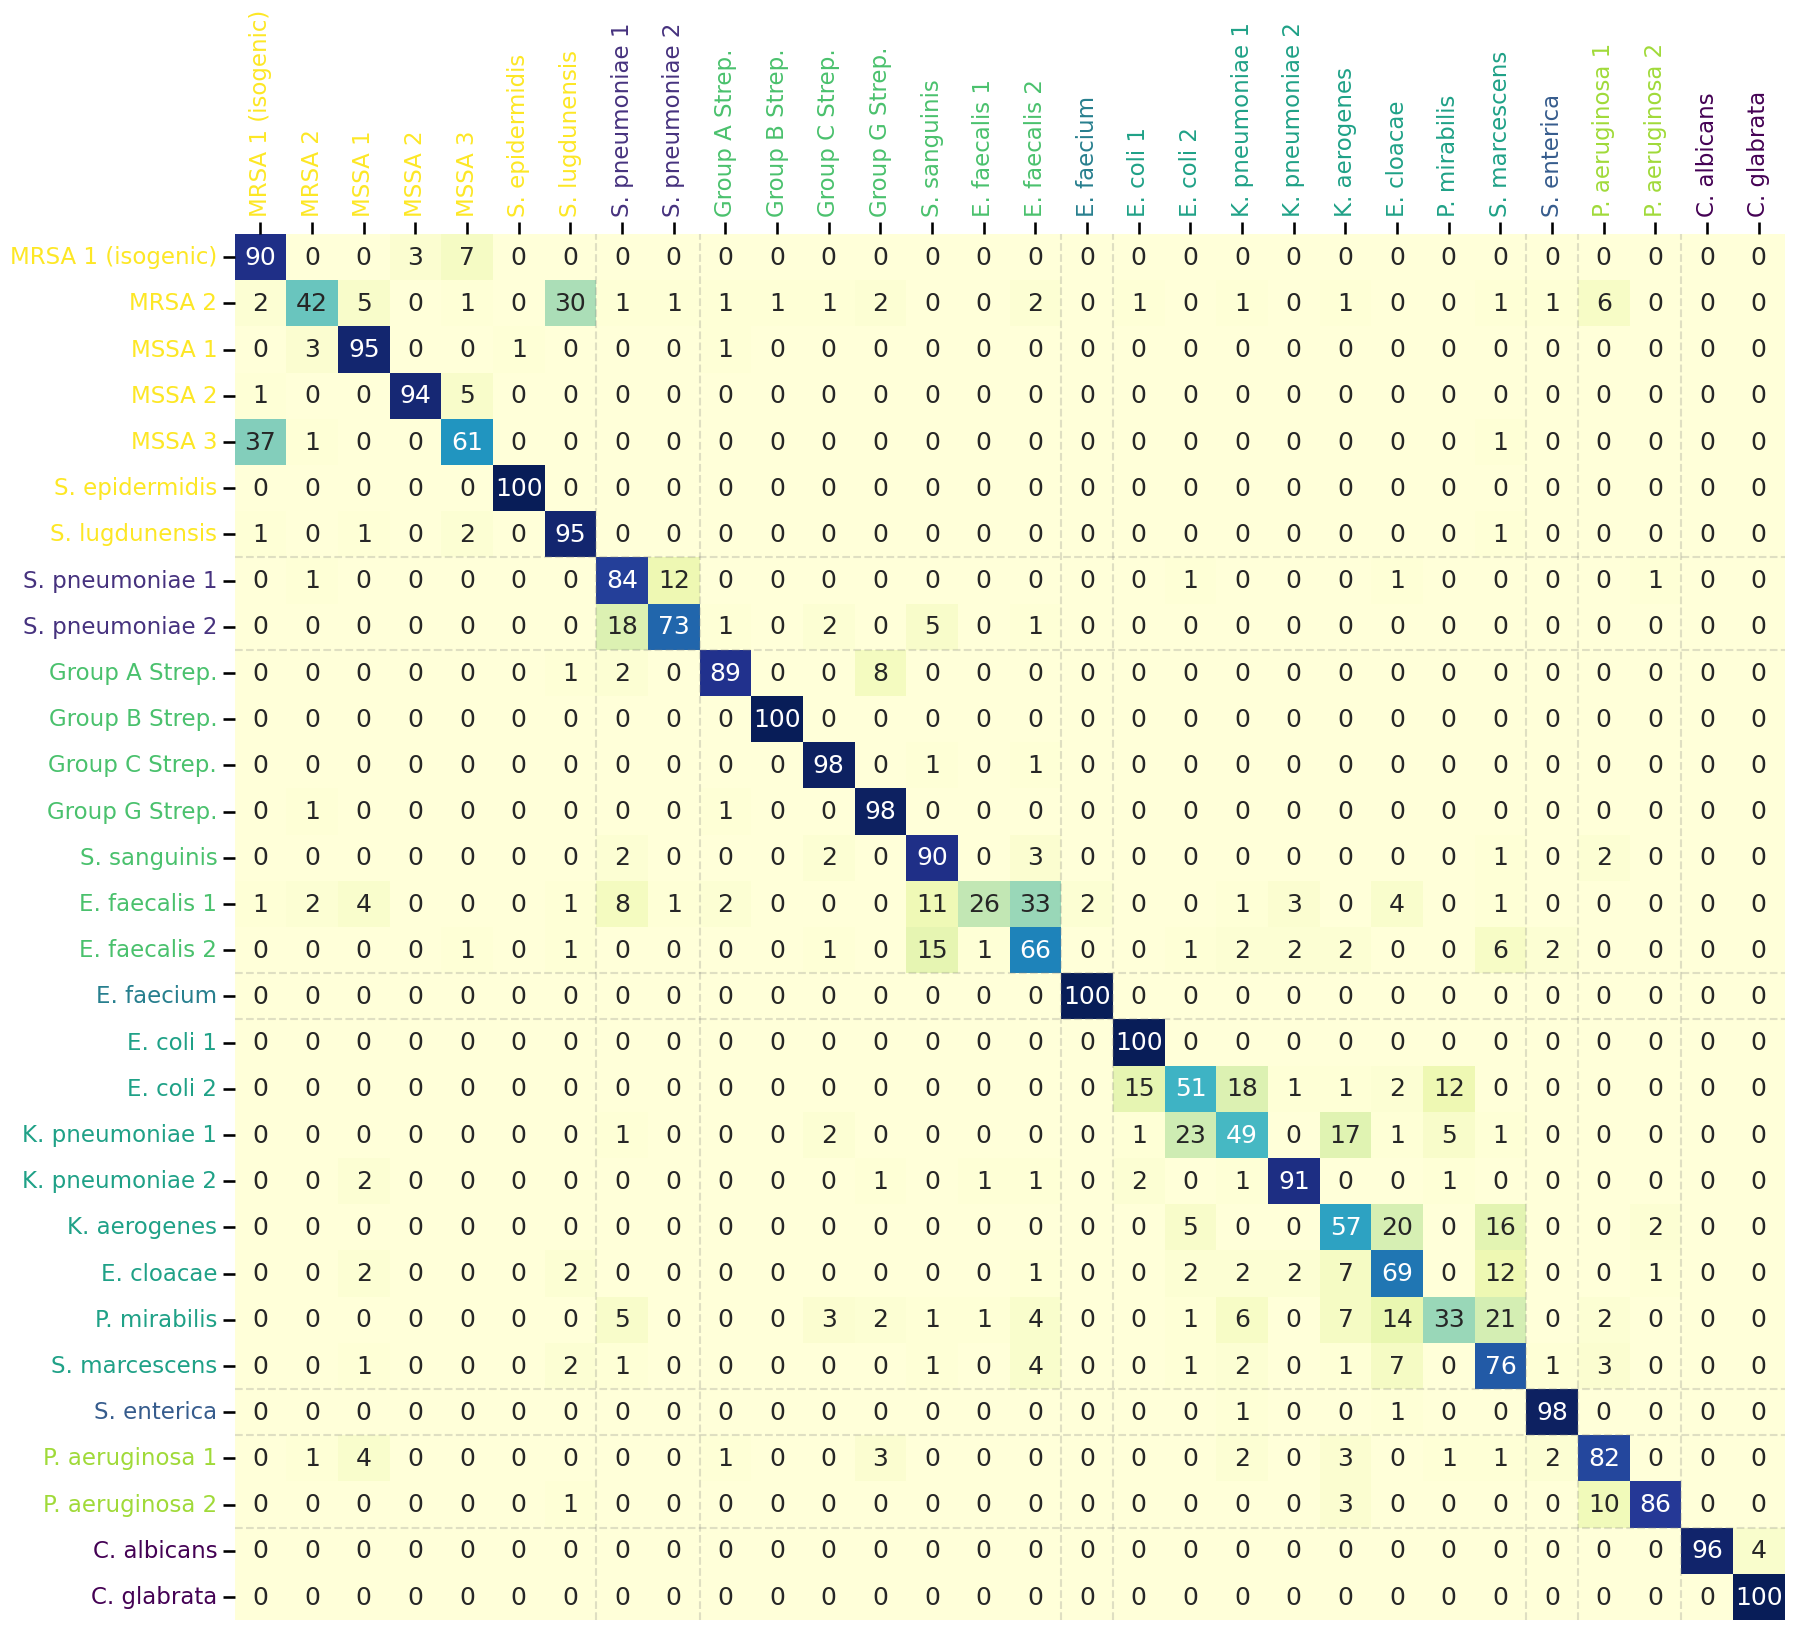

In [24]:
sns.set_context("talk")

label_order = [y_labels[i] for i in plotting_order]
cm = confusion_matrix(y_test, y_pred, labels=plotting_order)
cm = 100 * cm / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(20, 18))
ax = sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='0.0f',
                 xticklabels=label_order, yticklabels=label_order, cbar=False)
ax.xaxis.tick_top()

# color the antibiotic groups differently
for i, tick_label in enumerate(ax.get_yticklabels()):
    tick_label.set_color(antibiotics_colors[i])

for i, tick_label in enumerate(ax.get_xticklabels()):
    tick_label.set_color(antibiotics_colors[i])

# add lines separating the antibiotic groups
linewidth = 1.5
color = 'gray'
linestyle = '--'
alpha = 0.25

ax.axvline(7, 0, 2, linewidth=linewidth, c=color, linestyle=linestyle, alpha=alpha)
ax.axvline(9, 0, 2, linewidth=linewidth, c=color, linestyle=linestyle, alpha=alpha)
ax.axvline(16, 0, 2, linewidth=linewidth, c=color, linestyle=linestyle, alpha=alpha)
ax.axvline(17, 0, 2, linewidth=linewidth, c=color, linestyle=linestyle, alpha=alpha)
ax.axvline(25, 0, 2, linewidth=linewidth, c=color, linestyle=linestyle, alpha=alpha)
ax.axvline(26, 0, 2, linewidth=linewidth, c=color, linestyle=linestyle, alpha=alpha)
ax.axvline(28, 0, 2, linewidth=linewidth, c=color, linestyle=linestyle, alpha=alpha)

ax.axhline(7, 0, 2, linewidth=linewidth, c=color, linestyle=linestyle, alpha=alpha)
ax.axhline(9, 0, 2, linewidth=linewidth, c=color, linestyle=linestyle, alpha=alpha)
ax.axhline(16, 0, 2, linewidth=linewidth, c=color, linestyle=linestyle, alpha=alpha)
ax.axhline(17, 0, 2, linewidth=linewidth, c=color, linestyle=linestyle, alpha=alpha)
ax.axhline(25, 0, 2, linewidth=linewidth, c=color, linestyle=linestyle, alpha=alpha)
ax.axhline(26, 0, 2, linewidth=linewidth, c=color, linestyle=linestyle, alpha=alpha)
ax.axhline(28, 0, 2, linewidth=linewidth, c=color, linestyle=linestyle, alpha=alpha)

plt.xticks(rotation=90)

plt.show()

### Antibiotic-level classification



Calculate the antibiotic-level accuracy.



In [19]:
y_ab = np.asarray([antibiotics_labels[i] for i in y_test])
y_ab_hat = np.asarray([antibiotics_labels[i] for i in y_pred])

print(f"The accuracy of the Logistic Regression model is: {accuracy_score(y_ab, y_ab_hat)}")

The accuracy of the Logistic Regression model is: 0.9463333333333334


Plot the confusion matrix.



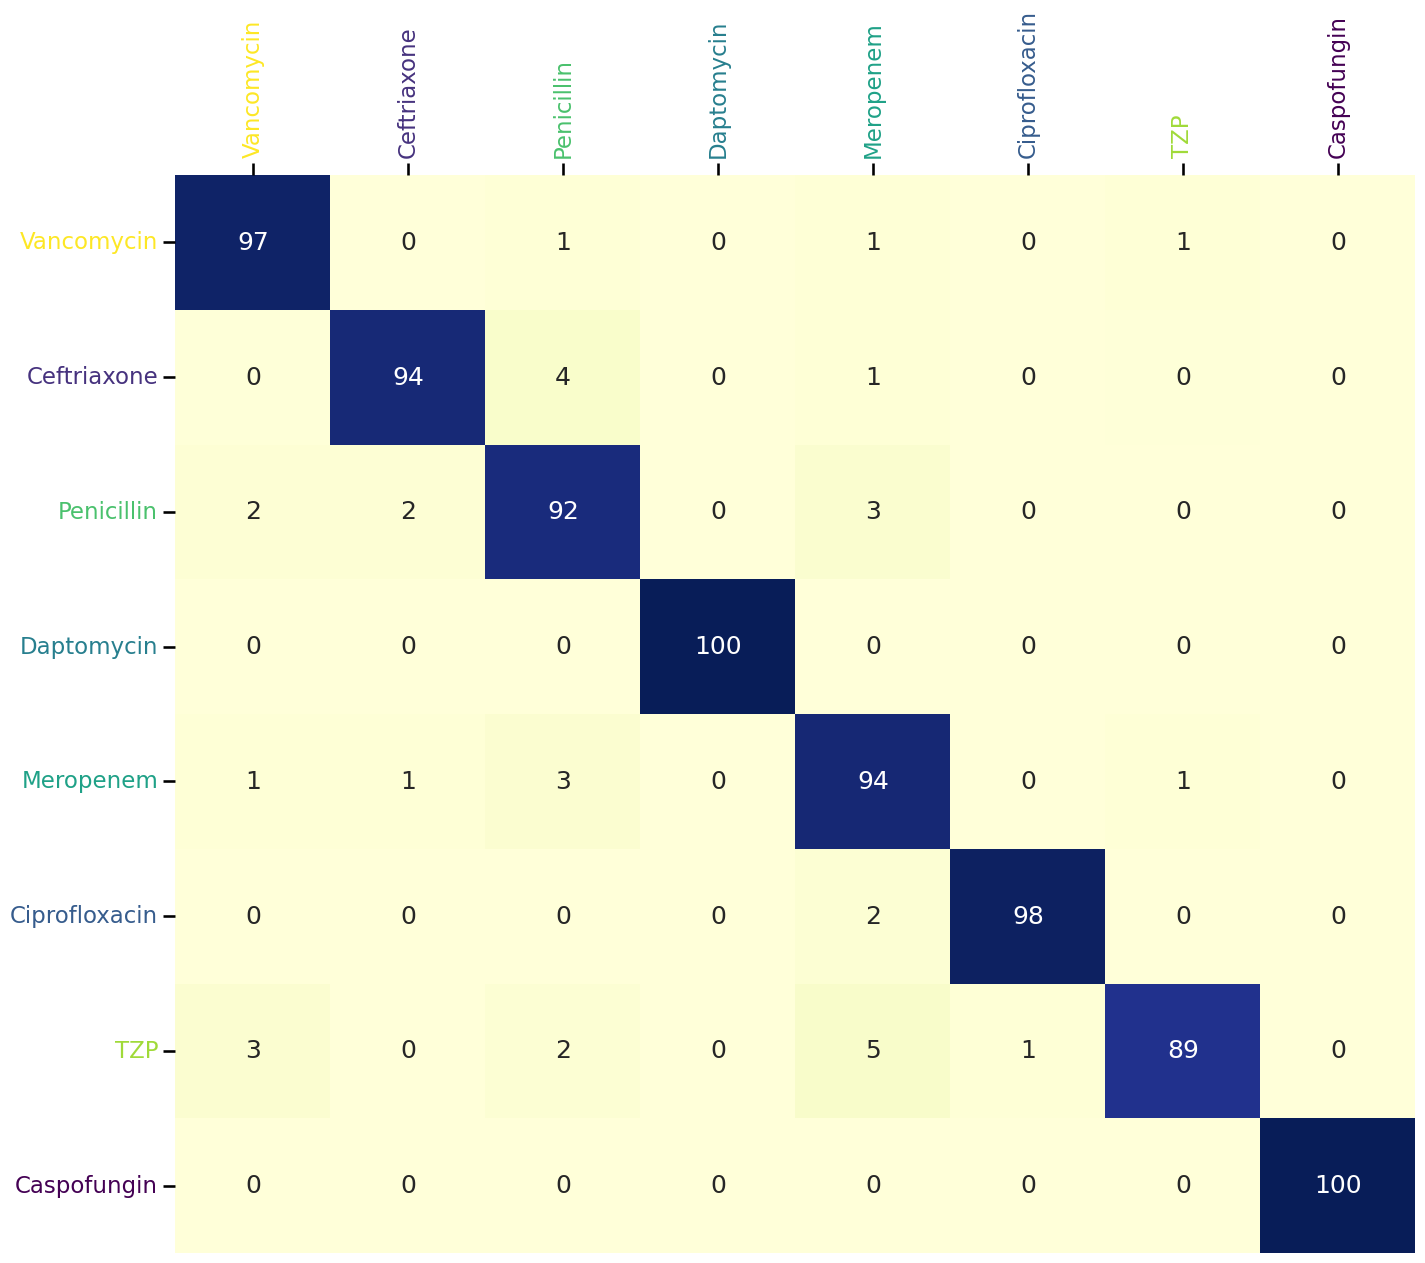

In [25]:
label_order = ['Vancomycin', 'Ceftriaxone', 'Penicillin', 'Daptomycin', 'Meropenem', 'Ciprofloxacin', 'TZP', 'Caspofungin']

cm = confusion_matrix(y_ab, y_ab_hat, labels=label_order)

plt.figure(figsize=(16, 14))
cm = 100 * cm / cm.sum(axis=1)[:,np.newaxis]
ax = sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='0.0f',
                 xticklabels=label_order, yticklabels=label_order, cbar=False)
ax.xaxis.tick_top()

for tick_label in ax.get_yticklabels():
    tick_label.set_color(antibiotic_color_map[tick_label.get_text()])

for tick_label in ax.get_xticklabels():
    tick_label.set_color(antibiotic_color_map[tick_label.get_text()])

plt.xticks(rotation=90)
plt.show()

## References
.. [1] Ho, CS., Jean, N., Hogan, C.A. et al. Rapid identification of pathogenic bacteria using Raman spectroscopy and deep learning. Nat Commun 10, 4927 (2019).

